[Otto Group Product Classification Challenge](https://www.kaggle.com/c/otto-group-product-classification-challenge)

In [1]:
import matplotlib.pyplot as plt
import sklearn.ensemble
import sklearn.manifold
import sklearn.decomposition
import sklearn.metrics
import numpy as np
import pandas as pd

In [2]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

### Data Download

In [3]:
from sklearn.model_selection import train_test_split
data = pd.read_csv("../input/train.csv")
df = data.drop("id", axis=1)
print(df.shape)

(61878, 94)


In [4]:
df['target'].value_counts()

Class_2    16122
Class_6    14135
Class_8     8464
Class_3     8004
Class_9     4955
Class_7     2839
Class_5     2739
Class_4     2691
Class_1     1929
Name: target, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61878 entries, 0 to 61877
Data columns (total 94 columns):
feat_1     61878 non-null int64
feat_2     61878 non-null int64
feat_3     61878 non-null int64
feat_4     61878 non-null int64
feat_5     61878 non-null int64
feat_6     61878 non-null int64
feat_7     61878 non-null int64
feat_8     61878 non-null int64
feat_9     61878 non-null int64
feat_10    61878 non-null int64
feat_11    61878 non-null int64
feat_12    61878 non-null int64
feat_13    61878 non-null int64
feat_14    61878 non-null int64
feat_15    61878 non-null int64
feat_16    61878 non-null int64
feat_17    61878 non-null int64
feat_18    61878 non-null int64
feat_19    61878 non-null int64
feat_20    61878 non-null int64
feat_21    61878 non-null int64
feat_22    61878 non-null int64
feat_23    61878 non-null int64
feat_24    61878 non-null int64
feat_25    61878 non-null int64
feat_26    61878 non-null int64
feat_27    61878 non-null int64
feat_28    61878 non-null i

In [6]:
mapping = {'Class_2':2, 'Class_6':6, 'Class_8':8, 'Class_3':3, 'Class_9':9, 'Class_7':7, 'Class_4':4, 'Class_5':5, 'Class_1':1}      
#mapping = {'set': 1, 'test': 2}
df_cat = df.replace({'target': mapping})

In [7]:
df_cat.head()

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,feat_11,feat_12,feat_13,feat_14,feat_15,feat_16,feat_17,feat_18,feat_19,feat_20,feat_21,feat_22,feat_23,feat_24,feat_25,feat_26,feat_27,feat_28,feat_29,feat_30,feat_31,feat_32,feat_33,feat_34,feat_35,feat_36,feat_37,feat_38,feat_39,feat_40,...,feat_55,feat_56,feat_57,feat_58,feat_59,feat_60,feat_61,feat_62,feat_63,feat_64,feat_65,feat_66,feat_67,feat_68,feat_69,feat_70,feat_71,feat_72,feat_73,feat_74,feat_75,feat_76,feat_77,feat_78,feat_79,feat_80,feat_81,feat_82,feat_83,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,0,0,0,0,1,0,4,1,1,0,0,2,0,0,0,0,0,1,0,0,0,0,1,...,0,0,2,0,0,11,0,1,1,0,1,0,7,0,0,0,1,0,0,0,0,0,0,0,2,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,2,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,6,0,0,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,1,0,0,1,6,1,5,0,0,1,1,0,1,0,0,1,1,0,0,0,0,0,0,7,2,2,0,0,0,58,0,10,0,0,0,0,0,3,0,0,...,1,0,0,0,0,0,0,0,0,0,2,1,5,0,0,4,0,0,2,1,0,1,0,0,1,1,2,2,0,22,0,1,2,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,3,0,0,0,0,0,0,0,4,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1


In [8]:
y = df_cat['target'].values
X = df_cat.drop('target', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle = False)

### Visualization with PCA

In [9]:
from sklearn.decomposition import PCA

In [10]:
pca = PCA(n_components=2)
pca.fit(X_train)
model_pca_trans = pca.fit_transform(X_train)

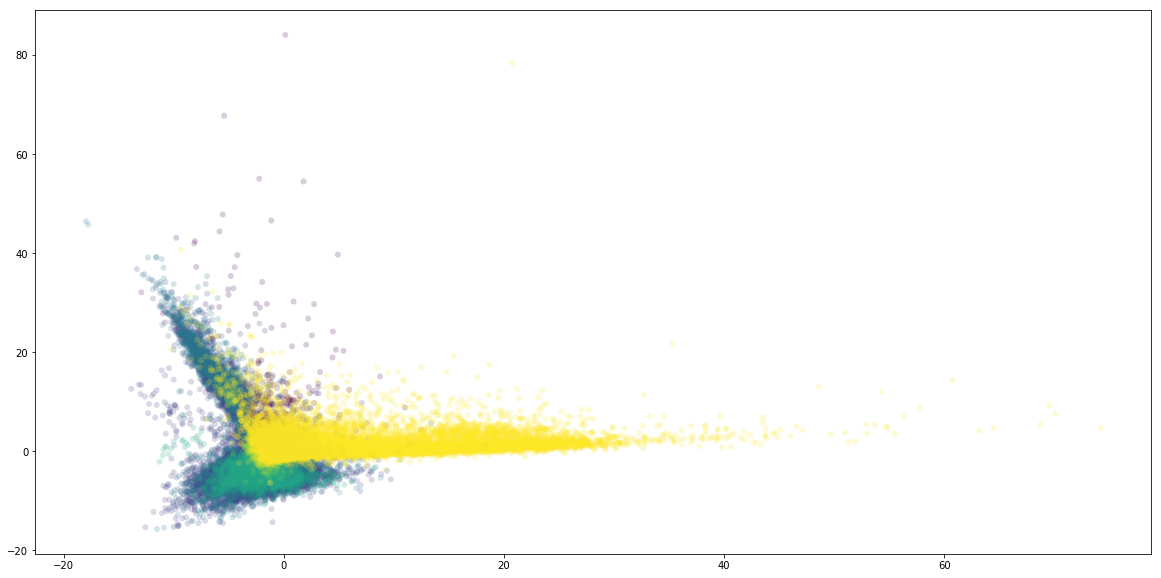

In [11]:
plt.figure(figsize=(20, 10))
label_color_dict = {label:idx for idx, label in enumerate(np.unique(y_train))}
cvec = [label_color_dict[label] for label in y_train]
plt.scatter(model_pca_trans[:, 0], model_pca_trans[:, 1], c=cvec, edgecolor='', alpha=0.2)

### Visualization with t-SNE

In [12]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2,  learning_rate=1000, init="random", random_state=1234).fit_transform(X_train)

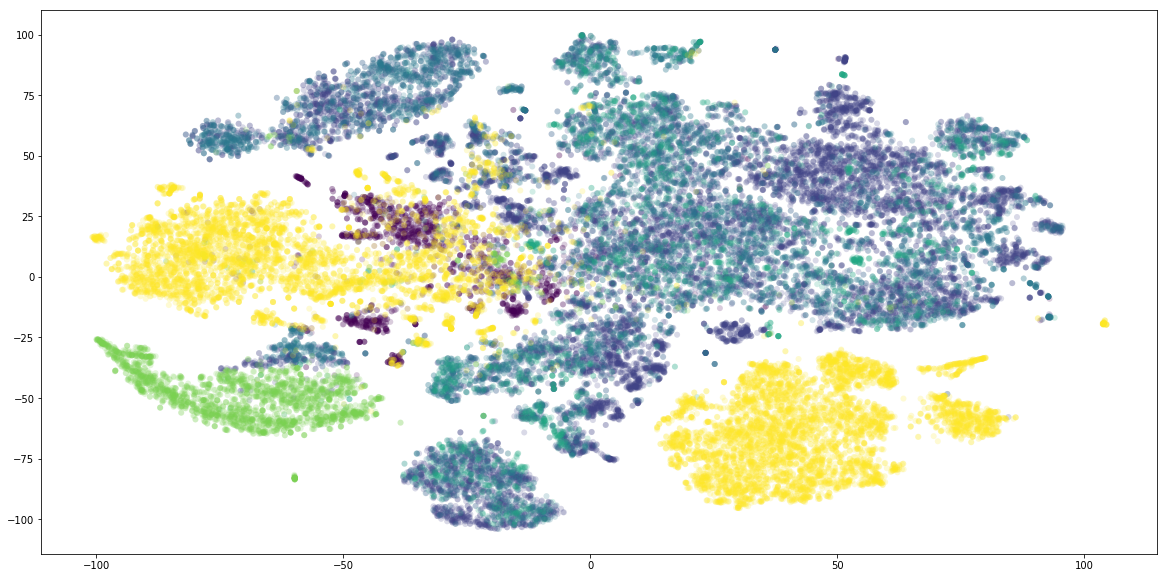

In [13]:
plt.figure(figsize=(20, 10))
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=cvec, edgecolor='', alpha=0.2)

### Training models

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [15]:
param_grid_lr = {
    'C': np.power(10., np.arange(-4,4,1,dtype=int))
}
lr = LogisticRegression(solver='liblinear')
sg_lr = GridSearchCV(lr, param_grid_lr, scoring='neg_log_loss', cv=5)
sg_lr.fit(X_train, y_train)
# оптимальные параметры
print(sg_lr.best_params_, '\n')
print(sg_lr.best_score_, '\n')
print(sg_lr.best_estimator_, '\n')

{'C': 1.0} 

-0.5856663423146253 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False) 



In [16]:
# обучение случайного леса
param_grid_rf = {
    'max_depth': np.arange(2,48,2,dtype=int),
}
rf = RandomForestClassifier(n_estimators=50)
# поиск по сетке
sg_rf = GridSearchCV(rf, param_grid_rf, scoring='neg_log_loss', cv=5)
sg_rf.fit(X_train, y_train)
# оптимальные параметры
print(sg_rf.best_params_, '\n')
print(sg_rf.best_score_, '\n')
print(sg_rf.best_estimator_, '\n')

{'max_depth': 30} 

-0.5132028801187203 

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=30, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False) 



In [17]:
from sklearn import metrics

In [19]:
# линейная регрессия
print('LogisticRegression')
print('accuracy', metrics.accuracy_score(y_test, sg_lr.predict(X_test)))

LogisticRegression
accuracy 0.11926308985132515


In [22]:
# Случайный лес
print('RandomForestClassifier')
print('accuracy', metrics.accuracy_score(y_test, sg_rf.predict(X_test)))

RandomForestClassifier
accuracy 0.12077138547726783


### Use PCA to improve classification

In [23]:
pca_test = PCA(n_components=2)
pca_test.fit(X_test)
model_pca_trans_test = pca.fit_transform(X_test)

In [24]:
lr_pca = LogisticRegression(solver='liblinear')
sg_lr_pca = GridSearchCV(lr_pca, param_grid_lr, scoring='neg_log_loss', cv=5)
sg_lr_pca.fit(model_pca_trans, y_train)
# оптимальные параметры
print(sg_lr_pca.best_params_, '\n')
print(sg_lr_pca.best_score_, '\n')
print(sg_lr_pca.best_estimator_, '\n')

{'C': 1000.0} 

-1.1047694190039032 

LogisticRegression(C=1000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False) 



In [26]:
# линейная регрессия
print('LogisticRegression')
print('accuracy', metrics.accuracy_score(y_test, sg_lr_pca.predict(model_pca_trans_test)))

LogisticRegression
accuracy 0.005709976298211592


In [27]:
# обучение случайного леса
rf_pca = RandomForestClassifier(n_estimators=50)
# поиск по сетке
sg_rf_pca = GridSearchCV(rf_pca, param_grid_rf, scoring='neg_log_loss', cv=5)
sg_rf_pca.fit(model_pca_trans, y_train)
# оптимальные параметры
print(sg_rf_pca.best_params_, '\n')
print(sg_rf_pca.best_score_, '\n')
print(sg_rf_pca.best_estimator_, '\n')

{'max_depth': 10} 

-0.8601353277163976 

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False) 



In [29]:
# Случайный лес
print('RandomForestClassifier')
print('accuracy', metrics.accuracy_score(y_test, sg_rf_pca.predict(model_pca_trans_test)))

RandomForestClassifier
accuracy 0.004794225382460677


### Using t-SNE to improve classification

In [30]:
X_embedded_test = TSNE(n_components=2,  learning_rate=1000, init="random", random_state=1234).fit_transform(X_test)

In [31]:
lr_sne = LogisticRegression(solver='liblinear')
sg_lr_sne = GridSearchCV(lr_sne, param_grid_lr, scoring='neg_log_loss', cv=5)
sg_lr_sne.fit(X_embedded, y_train)
# оптимальные параметры
print(sg_lr_sne.best_params_, '\n')
print(sg_lr_sne.best_score_, '\n')
print(sg_lr_sne.best_estimator_, '\n')

{'C': 1.0} 

-1.2688209866202822 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False) 



In [32]:
# линейная регрессия
print('LogisticRegression')
print('accuracy', metrics.accuracy_score(y_test, sg_lr_sne.predict(X_embedded_test)))

LogisticRegression
accuracy 0.04357897004955828


In [33]:
# обучение случайного леса
rf_sne = RandomForestClassifier(n_estimators=50)
# поиск по сетке
sg_rf_sne = GridSearchCV(rf_sne, param_grid_rf, scoring='neg_log_loss', cv=5)
sg_rf_sne.fit(X_embedded, y_train)
# оптимальные параметры
print(sg_rf_pca.best_params_, '\n')
print(sg_rf_pca.best_score_, '\n')
print(sg_rf_pca.best_estimator_, '\n')

{'max_depth': 10} 

-0.8601353277163976 

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False) 



In [34]:
# Случайный лес
print('RandomForestClassifier')
print('accuracy', metrics.accuracy_score(y_test, sg_rf_sne.predict(X_embedded_test)))

RandomForestClassifier
accuracy 0.010665804783451843


## Using t-SNE and PCA don't improve classification